<a href="https://colab.research.google.com/github/anusairam/anusairam/blob/main/Capstone_project_AttritionGuard_Predictive_Analytics_for_Employee_Retention_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement:
Predicts whether an employee is likely to leave (attrition) or stay with the company (no attrition) based on factors such as demographics, job satisfaction, performance metrics, salary, etc.This problem statement focuses on building a machine learning model to predict employee attrition. In simpler terms, the model will analyze various factors about employees and try to forecast whether they are at risk of leaving the company (attrition) or likely to stay (no attrition).Includes factors such as age, gender, education level, marital status, and tenure in the company.
Demographic data can provide insights into how different groups of employees may have varying attrition rates.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_hr = pd.read_csv(r"C:\Users\Anu\Downloads\HR_Employee_Attrition_Data.csv")

In [ ]:
df_hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2936,...,3,80,1,17,3,3,5,2,0,3
2936,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2937,...,1,80,1,9,5,3,7,7,1,7
2937,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2938,...,2,80,1,6,0,3,6,2,0,3
2938,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2939,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df_hr.shape

(2940, 35)

In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

In [ ]:
df_hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df_hr.describe

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
2935   36        No  Travel_Frequently        884  Research & Development   
2936   39        No      Travel_Rarely        613  Research & Development   
2937   27        No      Travel_Rarely        155  Research & Development   
2938   49        No  Travel_Frequently       1023                   Sales   
2939   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

In [ ]:
df_hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df_hr.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2935    False
2936    False
2937    False
2938    False
2939    False
Length: 2940, dtype: bool

In [ ]:
df_hr[df_hr.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [ ]:
df_hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.005175,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.025742,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.016464,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.020950,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005175,-0.025742,0.016464,0.020950,NaN,1.000000,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.008712,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.017377,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.003552,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.009020,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [ ]:
ftr=['Department', 'Attrition','Age','Education','HourlyRate ',' JobSatisfaction','MonthlyIncome','YearsWithCurrManager','YearsSinceLastPromotion','PercentSalaryHike','PerformanceRating','EmployeeCount','WorkLifeBalance']

In [ ]:
ftr

['Department',
 'Attrition',
 'Age',
 'Education',
 'HourlyRate ',
 ' JobSatisfaction',
 'MonthlyIncome',
 'YearsWithCurrManager',
 'YearsSinceLastPromotion',
 'PercentSalaryHike',
 'PerformanceRating',
 'EmployeeCount',
 'WorkLifeBalance']

In [ ]:
df_hr[['YearsSinceLastPromotion','StockOptionLevel','YearsAtCompany','YearsWithCurrManager']] = df_hr[['YearsSinceLastPromotion','StockOptionLevel','YearsAtCompany','YearsWithCurrManager']].replace(0, np.NaN)
df_hr.dropna(inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def identify_missing_data(df):
    """Identify missing data for each column in a DataFrame"""
    missing_data = df.isnull().sum()
    return missing_data[missing_data > 0]
def identify_outliers(df, threshold=1.5):
    """Identify outliers using the IQR method for each column in a DataFrame"""
    outliers = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return {k: v for k, v in outliers.items() if not v.empty}
data = {
    'A': [1, 2, 3, 4, 5, 100],
    'B': [6, 7, 8, 9, 10, np.nan],
    'C': ['p', 'q', 'r', 's', np.nan, 'u']
}
df = pd.DataFrame(data)

print("Missing Data:")
print(identify_missing_data(df))
print("\nOutliers:")
outliers_data = identify_outliers(df)
for col, outlier_df in outliers_data.items():
    print(f"{col}: {outlier_df[col].tolist()}")

Missing Data:
B    1
C    1
dtype: int64

Outliers:
A: [100]


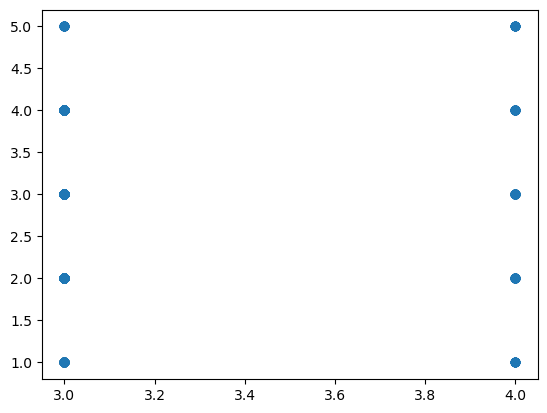

In [ ]:
plt.scatter(df_hr['PerformanceRating'], df_hr['Education'])
plt.show()

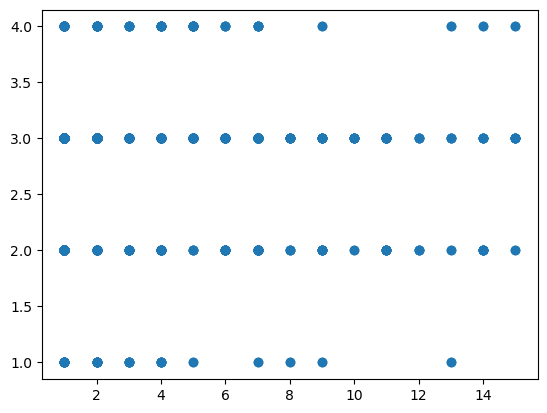

In [ ]:
plt.scatter(df_hr['YearsSinceLastPromotion'], df_hr['WorkLifeBalance'])
plt.show()

In [ ]:
sns.pairplot(df_hr)

In [ ]:
sns.heatmap(df_hr.corr(), annot=True)

In [ ]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 1 to 2936
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       968 non-null    int64  
 1   Attrition                 968 non-null    object 
 2   BusinessTravel            968 non-null    object 
 3   DailyRate                 968 non-null    int64  
 4   Department                968 non-null    object 
 5   DistanceFromHome          968 non-null    int64  
 6   Education                 968 non-null    int64  
 7   EducationField            968 non-null    object 
 8   EmployeeCount             968 non-null    int64  
 9   EmployeeNumber            968 non-null    int64  
 10  EnvironmentSatisfaction   968 non-null    int64  
 11  Gender                    968 non-null    object 
 12  HourlyRate                968 non-null    int64  
 13  JobInvolvement            968 non-null    int64  
 14  JobLevel 

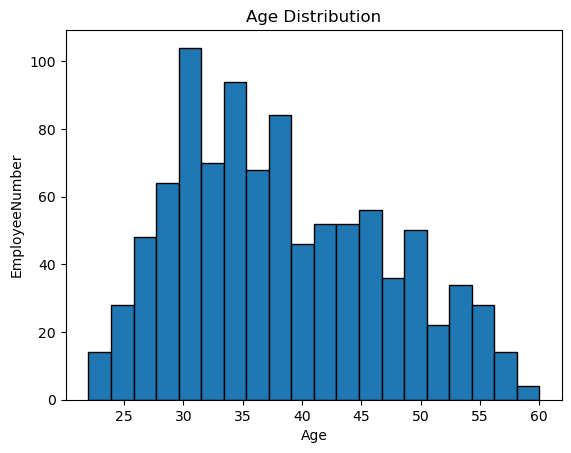

In [ ]:
plt.hist(df_hr['Age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('EmployeeNumber')
plt.show()


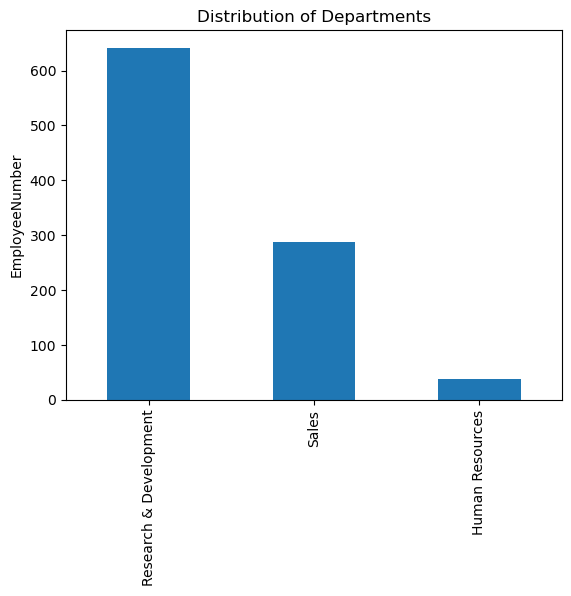

In [ ]:
df_hr['Department'].value_counts().plot(kind='bar')
plt.title('Distribution of Departments')
plt.ylabel('EmployeeNumber')
plt.show()


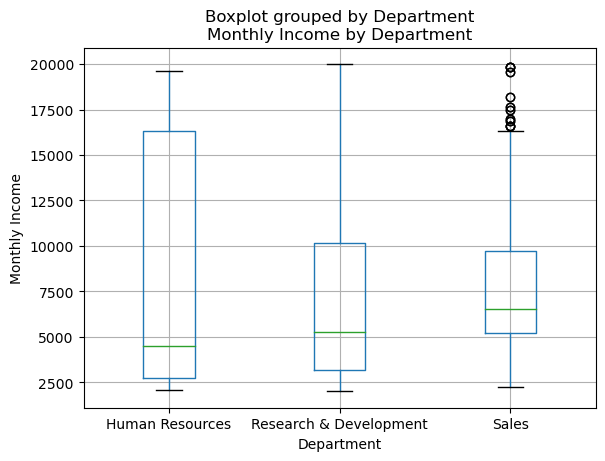

In [ ]:
df_hr.boxplot(column='MonthlyIncome', by='Department')
plt.title('Monthly Income by Department')
plt.ylabel('Monthly Income')
plt.show()


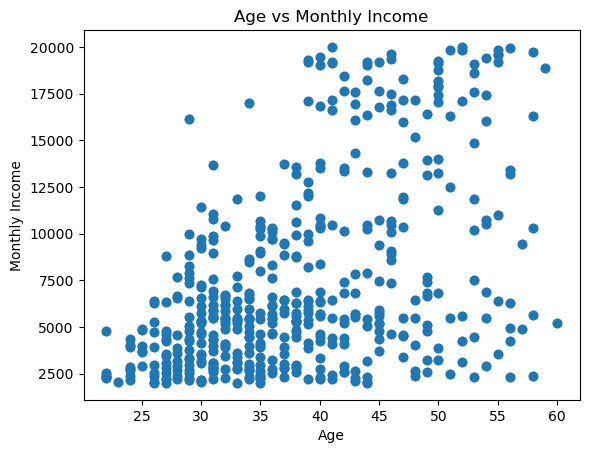

In [ ]:
plt.scatter(df_hr['Age'], df_hr['MonthlyIncome'])
plt.title('Age vs Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()


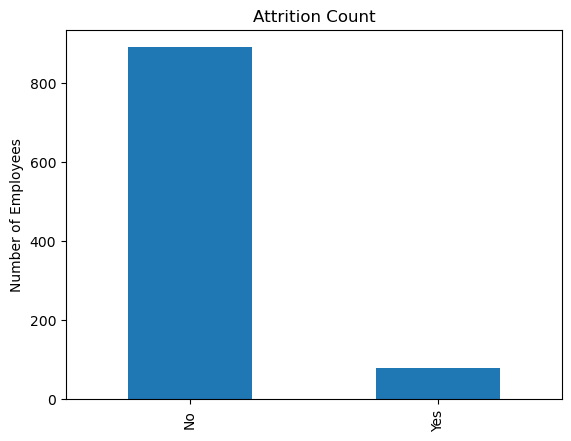

In [ ]:
df_hr['Attrition'].value_counts().plot(kind='bar')
plt.title('Attrition Count')
plt.ylabel('Number of Employees')
plt.show()


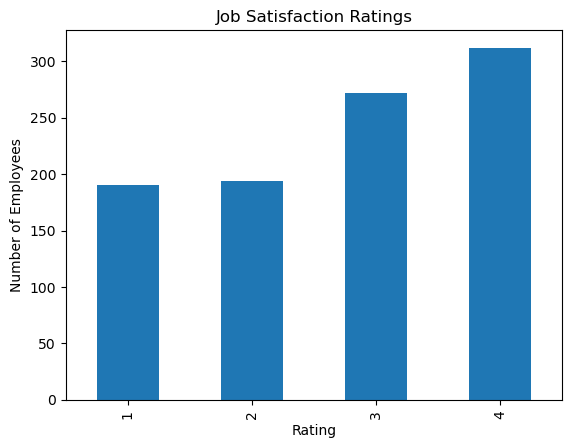

In [ ]:
df_hr['JobSatisfaction'].value_counts().sort_index().plot(kind='bar')
plt.title('Job Satisfaction Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Employees')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df_hr = pd.read_csv(r"C:\Users\Anu\Downloads\HR_Employee_Attrition_Data.csv")
df_hr = pd.get_dummies(df_hr, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], drop_first=True)
df_hr['Attrition'] = df_hr['Attrition'].map({'Yes': 1, 'No': 0})
df_hr = df_hr.drop(columns=['EmployeeNumber'])

In [ ]:
X = df_hr.drop('Attrition', axis=1)
y = df_hr['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.28%
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       489
           1       1.00      0.84      0.91        99

    accuracy                           0.97       588
   macro avg       0.98      0.92      0.95       588
weighted avg       0.97      0.97      0.97       588

[[489   0]
 [ 16  83]]


In [ ]:
feature_importances = clf.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                              Feature  Importance
10                      MonthlyIncome    0.075287
0                                 Age    0.057340
1                           DailyRate    0.055196
18                  TotalWorkingYears    0.052915
45                       OverTime_Yes    0.051887
11                        MonthlyRate    0.049309
6                          HourlyRate    0.048862
2                    DistanceFromHome    0.045379
21                     YearsAtCompany    0.039561
24               YearsWithCurrManager    0.034245
13                  PercentSalaryHike    0.033894
12                 NumCompaniesWorked    0.032935
5             EnvironmentSatisfaction    0.030833
22                 YearsInCurrentRole    0.027891
17                   StockOptionLevel    0.026893
9                     JobSatisfaction    0.026223
20                    WorkLifeBalance    0.025702
19              TrainingTimesLastYear    0.025569
7                      JobInvolvement    0.024532


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9727891156462585
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       489
           1       1.00      0.84      0.91        99

    accuracy                           0.97       588
   macro avg       0.98      0.92      0.95       588
weighted avg       0.97      0.97      0.97       588

Confusion Matrix:
[[489   0]
 [ 16  83]]


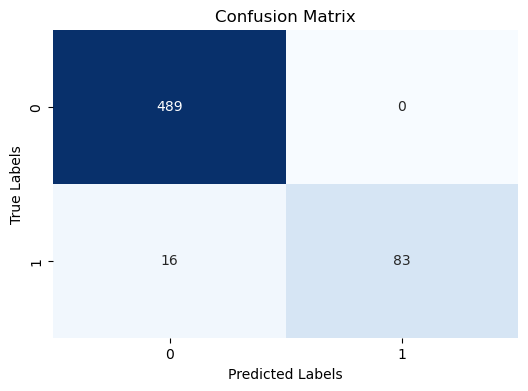

In [ ]:
from sklearn.metrics import confusion_matrix
cm = [[489, 0],
      [16, 83]]
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
